In [1]:
#Title = 3. Convolutional neural network (CNN): Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

I:\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
#The dataset contains grayscale images of fashion items (like clothing and accessories) with corresponding labels.
#contain the training images and their corresponding labels

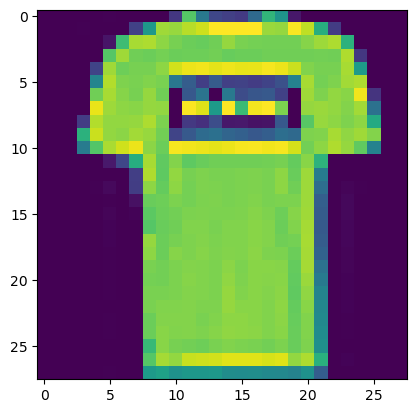

In [4]:
plt.imshow(x_train[1])
#This line displays an image from the training set (x_train) at index 1.
#plt.imshow() is a Matplotlib function used to display images.

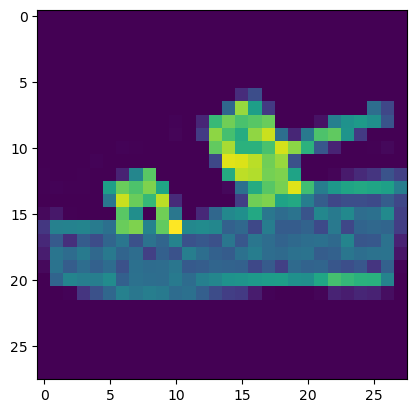

In [23]:
plt.imshow(x_train[12])

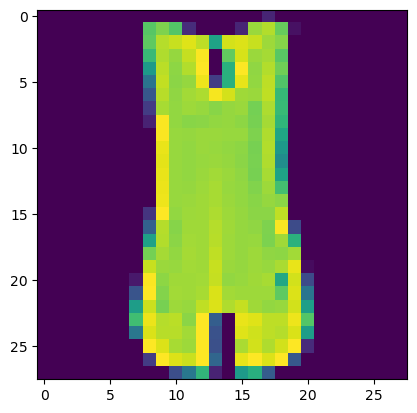

In [8]:
plt.imshow(x_train[4])

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [9]:
x_train = x_train.astype('float32') / 255.0
#Dividing by 255.0 scales these values to a range between 0 and 1, normalization technique for neural networks.
x_test = x_test.astype('float32') / 255.0
#(batch_size, height, width, channels-grayscale .: 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
x_test.shape

(10000, 28, 28, 1)

In [12]:
y_train.shape

(60000,)

In [13]:
y_test.shape

(10000,)

In [10]:
model = keras.Sequential([
keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(64, (3,3), activation='relu'),
keras.layers.MaxPooling2D((2,2)),
keras.layers.Dropout(0.25),
keras.layers.Conv2D(128, (3,3), activation='relu'),
keras.layers.Flatten(),
keras.layers.Dense(128, activation='relu'),
keras.layers.Dropout(0.25),
keras.layers.Dense(10, activation='softmax')
])
model.summary()
#This CNN architecture consists of:
#Three convolutional layers with increasing filters (32, 64, 128) for feature extraction.
#Max pooling layers for downsampling and reducing spatial dimensions.
#Dropout layers for regularization and preventing overfitting.
#Two dense layers for classification, with the final layer using softmax for multi-class predictions.

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Since the labels are integers (0 to 9),For multi-class classification problems
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7035 - loss: 0.7898 - val_accuracy: 0.8525 - val_loss: 0.3927
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8586 - loss: 0.3896 - val_accuracy: 0.8820 - val_loss: 0.3240
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8792 - loss: 0.3313 - val_accuracy: 0.8918 - val_loss: 0.2976
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8879 - loss: 0.2998 - val_accuracy: 0.8978 - val_loss: 0.2823
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8943 - loss: 0.2809 - val_accuracy: 0.9009 - val_loss: 0.2684
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9035 - loss: 0.2617 - val_accuracy: 0.9003 - val_loss: 0.2736
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9053 - loss: 0.2516 - val_accuracy: 0.9009 - val_loss: 0.2646
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9086 -

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9065 - loss: 0.2611


In [13]:
tst_acc = format(test_acc*100,".2f")
print('Test accuracy:', tst_acc,"%")

Test accuracy: 90.76 %
